## Problem Statement

You are a manager in a real estate company and you want to find out the selling potential of a property. Based on historical data showing past transactions

In [2]:
pwd #my working directory

'C:\\Users\\adebayo.ogundele'

In [3]:
#import all needed libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\adebayo.ogundele\\Desktop\\ML Learning\\Classification Models\\House-Price.csv", header = 0)

In [5]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [6]:
df.shape
#get the total number of rows and columns 
#18 columns are of independent variables. One (Sold) is the dependent variable

(506, 19)

The data has 506 observations (rows) and 19 variables. The dependent variable is the Sold which shows whether the property was sold in the last three months. The sold variable is Boolean (1 or 0) 1 for True (Sold within 3 months), 0 (Not sold within 3 months)

In [7]:
#count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

We can see that we have missing values from n_hos_beds. This column must be handled before any analysis is done on them

In [8]:
#Run EDD
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


If there is a huge difference between the mean and median, we can easily say there is an outlier. If you also see huge differences in the 25%, 50%, 75% and max values of a variable, then that variable has outliers. Check the variable n_hot_rooms: there is a huge difference between the 75% value and the max, there is an outlier, it is probably skewed to the right. Also, for the rainfall variable, the minimum value is 3 and the 25% percentile is 28 which shows a huge difference and presence of outliers. W e can also say same for Price variable

sns boxplot is used to see the outliers categorically

## Identify outliers using boxplot for numerical data

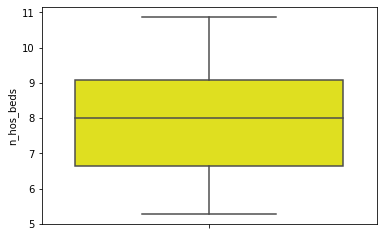

In [9]:
sns.boxplot(y = "n_hos_beds", data = df, color = "yellow") #the graph below shows no boxplot

The upper part, lower part and radius represents the 75%, 25% and 50%(median) of the data. The difference between the 75% and 25% percentiles is called the inter-quartile range (IQR)

In [10]:
?sns.boxplot #to know more about a boxplot

Object `sns.boxplot #to know more about a boxplot` not found.


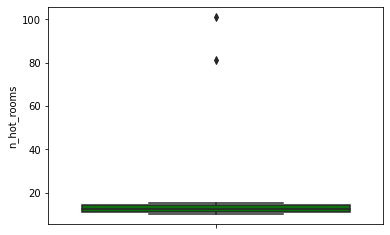

In [11]:
sns.boxplot (y = "n_hot_rooms", data = df, color = "green")

The above shows that we have two outliers in our n_hot_rooms variable

## Identify outliers using scatter plot for numerical data

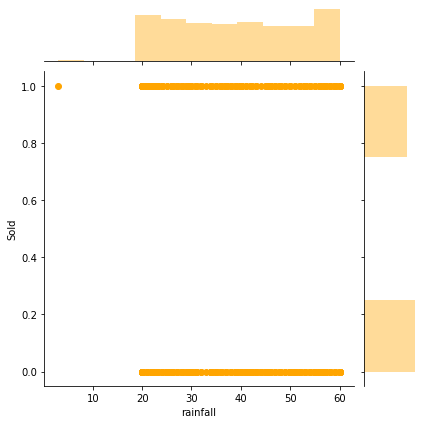

In [12]:
sns.jointplot(x="rainfall", y="Sold", data = df, color = "orange")

The graph shows there is a single outlier

## Identify outliers using count plot for categorical data

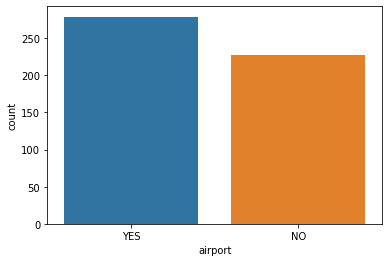

In [13]:
sns.countplot(x="airport", data = df)

There is nothing wrong with the data above

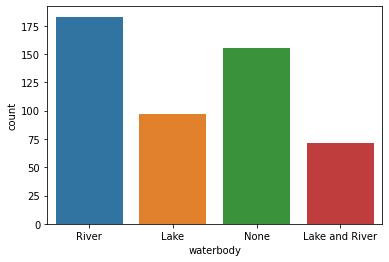

In [14]:
sns.countplot(x="waterbody", data = df)

There is nothing wrong with this data

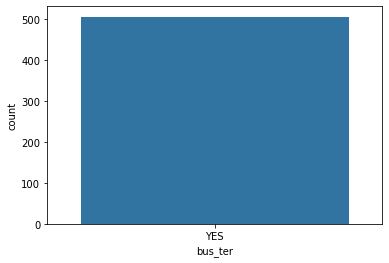

In [15]:
sns.countplot(x="bus_ter", data = df)

The bus_ter column will not regarded as a variable but rather a constant. It cannot have any impact on our prediction/analysis. This column can be deleted.

### Overall Observations
1. There are missing values in n_hos_beds
2. There are outliers in n_hot_rooms, rainfall
3. Bus_ter has only Yes values and can be dropped

## Treating Outliers on Rainfall, n_hot_rooms

### Identify the 99th of n_hot_rooms

In [16]:
## 99th percentile cos the values are large and mostly skewed to the left
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [17]:
#since the output is an array, we can get just the value by treating it as a list and getting the 0th index
np.percentile(df.n_hot_rooms,[99])[0]

15.399519999999999

In [18]:
#save the value of the 99th percentile to a variable called upper value (uv)
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [19]:
#identify rows were n_hot_rooms value are bigger than uv
df[(df.n_hot_rooms>uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


The table shows the rows which have higher n_hot_rooms values than uv

In [20]:
#CAPPING
#We can change or perform actions on the rows which have values of 101 and 81 because the difference is very much
#the other values are close to the uv
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv

<ipython-input-20-d8203912f370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv


In [21]:
# the equation above is to tell the system to equate all values of n_hot_rooms that are greater than 3uv to 3uv
df[(df.n_hot_rooms>uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344,0


### Identify the 1st percentile and treat outlier for rainfall

In [22]:
## 1st percentile cos the values are large and mostly skewed to the right
np.percentile(df.rainfall,[1])

array([20.])

In [23]:
lv = np.percentile(df.rainfall,[1])[0]

In [24]:
lv #lower value

20.0

In [25]:
df[(df.rainfall<lv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019,1


In [26]:
#Only one value in the outlier
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

<ipython-input-26-f196f730f88b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv


In [27]:
df[(df.rainfall<lv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019,1


In [28]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


Always check the closeness of the mean and median values

## Treating Missing Value

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

n_hos_beds has missing values cos its total is 498/506

Use df.info() to get infor for all data (numerical and categorical)

Its best to replace missing values with the mean of that column

In [30]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   506 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

    All missing values of n_hos_beds are now replaced with the mean hence the 506
    
    Supposing you want to fill missing values for all columns, you write df = df.fillna(df.mean)

## Variable Transformation

We have four variables talking about dist1 to dist4. We can easily create an average of all those distances using the data in dist1 to dist4



In [32]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [33]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545,3.795104
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,0.498422,2.105859
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000,1.127500
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,1.000000,5.187500
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000,12.127500


We can then delete all the four distances

In [34]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

In [35]:
df.describe()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545,3.795104
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,0.498422,2.105859
min,5.000000,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000,1.127500
25%,17.025000,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,1.000000,5.187500
max,50.000000,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000,12.127500


Recall we have to delete the bus_ter since it is a constant

In [36]:
del df['bus_ter']

In [37]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,0,6.0625


## Dummy Variable Creation
### We are doing this to categorical variables

In [38]:
df = pd.get_dummies(df) #this pandas function gives the new dummies for categorical variables

In [39]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,0,1,0,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,1,0,1,0,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,1,0,0,0,1,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,0,1,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,1,0,1,0,0,0


The number of dummy variables should be one less than categories. So we can delete airport_NO and waterbody_None

In [40]:
del df['airport_NO']
del df['waterbody_None']

In [41]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


In [42]:
df.shape

(506, 17)

## The Three Classification Models

1. Logistic Regression
2. Linear Discriminant Analysis
3. K NearestNeighnor

## Logistic Regression

To ways to create logistic reg
1. sklearn library
2. statsmodels

We proceed first by selecting our independent (x) and dependent variables(y). 
In this first case, we will select just one independent variable. Our dependent variable is Sold

In [43]:
x = df[['price']] #your indepedent variable should be two-dimensional

In [44]:
y = df['Sold'] #one dimensional

In [45]:
x.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [46]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression

For sklearn, we follow three steps:
1. Create Classification object
2. Find that object using x and y variable
3. Predict y using the trained classification model

In [48]:
#creating our classification object -- clf = classification, lrs- logistic regression
clf_lrs = LogisticRegression()

In [49]:
#fit our x and y variables
clf_lrs.fit(x, y)

LogisticRegression()

In [50]:
#check coefficient of model - BO
clf_lrs.coef_

array([[-0.03571865]])

In [51]:
#check for the intercept
clf_lrs.intercept_

array([0.61477516])

In [52]:
#using statsmodel
#BO will be 0 by default
#add constant term to dependent variable

import statsmodels.api as sn

In [53]:
#create a constant for the dependent variable
x_cons = sn.add_constant(x)

In [54]:
x_cons.head()

,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2


In [55]:
#plotting logistic regression classifier from a stats model
import statsmodels.discrete.discrete_model as sm

In [56]:
#train our x and y variable
#running a model
logit = sm.Logit(y, x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


In [57]:
#to see a sample of our model, we write
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                 0.01788
Time:                        13:13:43   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

B0 = coef-const, B1 = coef-price


## Logistic Regression with Multiple Predictors

In [58]:
#We wan to predict with all independent variables in the dataset
x =  df.loc[:,df.columns != 'Sold']

In [59]:
y = df['Sold']

In [60]:
clf_lr = LogisticRegression()
clf_lr.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
clf_lr.coef_

array([[-0.24637243, -0.01730291, -0.11022683,  0.86277639, -0.0059989 ,
         0.22816968, -0.21023643,  0.18004314, -0.09084017, -0.00704124,
        -0.00499361, -0.32613259, -0.10523677, -0.09488488, -0.01512687,
         0.20183465]])

In [62]:
clf_lr.intercept_

array([0.0167139])

In [63]:
x_cons = sn.add_constant(x)

In [64]:
logit = sm.Logit(y, x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.556433
         Iterations 6


In [65]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                  0.1924
Time:                        13:13:45   Log-Likelihood:                -281.56
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 9.930e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1383      2.649     -0.807      0.420      -7.331       3.054
price                       -0.2741      0.033     -8.313      0.000      -0.339      -0.209
resid_area                   0.0192      0.027      0.720      0.471      -0.033       0.071
air_qual                    -7.4183      2.691     -2.757      0.006     -12.693      -2.144
room_num                     1.1067      0.277      4.001      0.000       0.565       1.649
age                         -0.0020      0.007     -0.302      0.762      -0.015       0.011
teachers                     0.3150      0.064      4.937      0.000       0.190       0.440
poor_prop                   -0.2077      0.034     -6.149      0.000      -0.274      -0.141
n_hos_beds                   0.1760      0.071      2.467      0.014       0.036       0.316
n_hot_rooms                 -0.0742      0.052     -1.439      0.150      -0.175       0.027
rainfall                    -0.0033      0.008     -0.394      0.693      -0.020       0.013
parks                       29.1089     24.177      1.204      0.229     -18.277      76.495
avg_dist                    -0.4017      0.098     -4.118      0.000      -0.593      -0.211
airport_YES                 -0.1524      0.211     -0.723      0.469      -0.565       0.261
waterbody_Lake              -0.1032      0.304     -0.340      0.734      -0.698       0.492
waterbody_Lake and River    -0.0626      0.328     -0.191      0.849      -0.705       0.580
waterbody_River              0.2394      0.256      0.937      0.349      -0.262       0.740
============================================================================================
"""

## Predicting and Confusion Matrix

In [66]:
#to get the predicted values from our model
clf_lr.predict_proba(x)

array([[0.12706687, 0.87293313],
       [0.39754145, 0.60245855],
       [0.98070074, 0.01929926],
       ...,
       [0.28589054, 0.71410946],
       [0.28054518, 0.71945482],
       [0.16346961, 0.83653039]])

The first column is Pr(0) which is equal to Probability of not sold. The second column is the Probability of Sold. Pr(1)

We also want to set a boundary condition to set for sold and not sold predictions.

If Pr(1) is less than 0.5, then the house cannot be sold in 3 months

In [67]:
y_pred = clf_lr.predict(x)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

All result with 1 are those whose predicted values are above 0.5. It is default to predict with 0.5 as boundary using clf_lr.predict. 

In [68]:
#setting a boundary 0f 0.3
y_pred_03 = (clf_lr.predict_proba(x)[:,1] > 0.3)

In [69]:
y_pred_03

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,

In [70]:
#How many times we are predicting the correct thing and wrong thing
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[196,  80],
       [ 81, 149]], dtype=int64)

196 = FalseFalse, 80 = FalsePositive
81 = TrueFalse, 149 = PositivePositive

In [71]:
confusion_matrix(y, y_pred_03)

array([[121, 155],
       [ 18, 212]], dtype=int64)

To compare performance of models, one can use the area under the curve of an ROC - Operating Characteristics

## Performance Metrics
Looking at Precision, Recall and AUC - Area Under the Curve for ROC

In [72]:
#import the libraries
from sklearn.metrics import precision_score, recall_score

In [73]:
precision_score(y, y_pred)

0.6506550218340611

In [74]:
recall_score (y, y_pred)

0.6478260869565218

In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
roc_auc_score (y,y_pred)

0.6789855072463769

## Linear Discriminant Analysis

1. Preffered when response variables has more than two classes
2. Based on Bayes Theory
3. Solves conditional probability

In [77]:
#import LDA function from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [78]:
clf_lda = LinearDiscriminantAnalysis()

In [79]:
clf_lda.fit(x,y)

LinearDiscriminantAnalysis()

In [80]:
y_pred_lda = clf_lda.predict(x)

In [81]:
y_pred_lda

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [82]:
confusion_matrix(y,y_pred_lda)

array([[192,  84],
       [ 79, 151]], dtype=int64)

In [131]:
accuracy_score(y, y_pred_lda)

0.6778656126482213

## K-Nearest Neighbors

Data will be splitted into two:
1. Training Data: which is used for training the model
2. Test Data: which is used for testing the model (unseen data)

Performance is tested using confusion matrix

Main Reason for splitting data into test and train:
1. There is no gurantee that is a model is given low training error, it will also help low test error

#### Techniques used in splitting data
1. Validation Set Approach: Division of data into two parts (80:20)(Training:Test)
2. Leave on out cross validation: Leave one observation everytime from training set
3. K-Fold validation: Divide data into k-sets. Keep one for testing and the other for training

In [83]:
#import libraary for test train split
from sklearn.model_selection import train_test_split

In [84]:
#getting all variables, test size is used in splitting data into 80:20, portion of test data = 0.2
#random_state by default is 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [85]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_train.shape)

(404, 16)
(102, 16)
(404,)
(404,)


Total Observation = 506
80% = 404

In [86]:
#fitting the model using logistic regression
from sklearn.linear_model import LogisticRegression

In [87]:
#classifier
clf_LR = LogisticRegression()

In [88]:
clf_LR.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_test_pred = clf_LR.predict(x_test)

In [90]:
y_test_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [92]:
confusion_matrix (y_test, y_test_pred)

array([[37, 21],
       [14, 30]], dtype=int64)

In [93]:
accuracy_score (y_test, y_test_pred) #percentage of obs. my model is able to predict correctly 
#result not great but its good
#always use the test data to compute confusion matrix and accuracy score

0.6568627450980392

In [94]:
#plot using Linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [95]:
clf_LDA2 = LinearDiscriminantAnalysis()

In [96]:
clf_LDA2.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [97]:
y_test_pred2 = clf_LDA2.predict(x_test)

In [98]:
y_test_pred2

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [99]:
#accuracy score and confusion matrix
confusion_matrix(y_test, y_test_pred2)

array([[34, 24],
       [11, 33]], dtype=int64)

In [100]:
accuracy_score(y_test, y_test_pred2)

0.6568627450980392

Both models gave same accuracy score of 0.6568627450980392

1. KNN is a non-parametric.
2. The most important is the value of K so as to get the right curve
3. In KNN, scale matters because distance between observations impacts the classifier
4. To handle scaling problems, standardize data

### Creating a KNN Model

In [101]:
#import model
from sklearn import preprocessing

In [102]:
#our scaler to standardize and fit the independent variable of our train data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)

In [103]:
#do same for the independent variable in the test data
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_s = scaler.transform(x_test)

In [104]:
x_test_s

array([[ 3.46427198e-02, -1.26009787e+00, -7.59976330e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [ 3.08888478e+00,  1.09537107e+00,  6.84309089e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [ 7.92301952e-02,  4.28041039e-01,  1.73890573e-04, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       ...,
       [-4.00085165e-01, -9.60512654e-01, -8.19099125e-01, ...,
        -4.93864798e-01, -3.98862018e-01,  1.32542701e+00],
       [ 6.47720506e-01, -9.50442563e-02, -5.15039037e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [-2.77469608e-01, -4.16820968e-01, -2.53209516e-01, ...,
        -4.93864798e-01,  2.50713268e+00, -7.54473836e-01]])

When we standardize a variable, we convert all the means to 0 and the standard deviation to 1

In [105]:
#time to train KNN model on our training dataset
from sklearn.neighbors import KNeighborsClassifier

In [106]:
clf_KNN_1 = KNeighborsClassifier(n_neighbors=1) #value of k = n_neighbors

In [107]:
clf_KNN_1.fit(x_train_s, y_train) #fitting our model

KNeighborsClassifier(n_neighbors=1)

In [108]:
y_test_pred_s = clf_KNN_1.predict(x_test_s)

In [109]:
y_test_pred_s

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [110]:
#creating a confusion matrix
confusion_matrix (y_test, y_test_pred_s)

array([[30, 28],
       [19, 25]], dtype=int64)

In [111]:
#getting the accuracy score
accuracy_score(y_test, y_test_pred_s) 

0.5392156862745098

accuracy of our KNN model with one neighbor i.e. k=1 is 0.5392156862745098

#### Run model for k=3

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
clf_KNN_k3 = KNeighborsClassifier(n_neighbors = 3)

In [114]:
clf_KNN_k3.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

In [115]:
y_test_pred_s3 = clf_KNN_k3.predict(x_test_s)

In [116]:
y_test_pred_s3

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [117]:
#creating a confusion matrix
confusion_matrix(y_test, y_test_pred_s3)

array([[32, 26],
       [21, 23]], dtype=int64)

In [118]:
#getting the accuracy of the model
accuracy_score(y_test, y_test_pred_s3)

0.5392156862745098

### Creating a single KNN model for multiple values of K

In [119]:
#grid search feature library
from sklearn.model_selection import GridSearchCV

In [120]:
#to give multiple values of K, create a dictionary that contains the values you wish
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [121]:
#creating the classifier
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [122]:
#now fit the data
grid_search_cv.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [123]:
grid_search_cv.best_params_ #to find out the best parameters under the params

{'n_neighbors': 9}

9 is the best value of K to run this model with

In [124]:
optimized_KNN = grid_search_cv.best_estimator_

In [125]:
optimized_KNN #to also find out the best parameters under the params

KNeighborsClassifier(n_neighbors=9)

In [126]:
y_test_pred_KNN = optimized_KNN.predict(x_test_s)
y_test_pred_KNN

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [127]:
#creatting a confusion matrix
confusion_matrix(y_test, y_test_pred_KNN)

array([[36, 22],
       [18, 26]], dtype=int64)

In [128]:
accuracy_score (y_test, y_test_pred_KNN)

0.6078431372549019

In [129]:
accuracy_score (y_test, y_test_pred_KNN)

0.6078431372549019

KNN does not permit for estimating values of the dependent variable using the independent variable. This is cos, KNN is non-parametric